# Rozpoznanie osób palących na podstawie ich wewnętrznego stanu biologicznego

Na podstawie zbioru: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

In [1]:
import pandas as pd
df = pd.read_csv('smoking.csv')

## Opis danych wejściowych

Przedstawienie pierwszych pięciu wierszy zbioru danych za pomocą funkcji *head()*. Zbiór danych zawiera 27 atrybuty przedstawione poniżej.

In [2]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Zapoznanie się z krótkim opisem danych za pomocą funkcji *info()*. Funkcja ta ukazuje ogólne informacje o danych, takie jak liczba wierszy, typy danych oraz ewentualne brakujące wartości.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

Zbiór składa się z 55 692 przykładów. Większość atrybutów ma wartości typu numerycznego (int64 i float64).

Wyjątek stanowią trzy pola: gender - opisujące płeć badanego pacjenta, oral - opisujące stan jamy ustnej pacjenta, tartar - opisujące czy pacjent posiada kamień nazębny. Typem tych atrybutów jest object, czyli nadrzędna klasa dla wszystkich obiektów tekstowych stworzonych w Pythonie.

Wartości tych trzech pól są powtarzalne, co oznacza, że stanowią one wartości kategorialne.

Warto więc sprawdzić powtarzalność tych danych.

In [4]:
df["gender"].value_counts()

gender
M    35401
F    20291
Name: count, dtype: int64

In [5]:
df["oral"].value_counts()

oral
Y    55692
Name: count, dtype: int64

In [6]:
df["tartar"].value_counts()

tartar
Y    30940
N    24752
Name: count, dtype: int64

Zauważyć można, że zarówno wartości atrybutu *gender*, jak i *tartar* są wartościami typu binarnego (zawierają tylko dwie kategorie). Natomiast wartość atrybutu *oral* posiada tylko jedną kategorię dla wszystkich wierszy, co prowadzi do wniosków, że można usunąć te kolumnę.

Oba binarne atrybuty zostaną więc, za pomocą techniki one-hot encoding, przekształcone na wartości binarne.

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[['gender', 'oral', 'tartar']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'oral', 'tartar']))

df.drop(['gender', 'oral', 'tartar'], axis=1, inplace=True)

df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

Po wykonaniu tej operacji, dla obu kolumn zostały utworzone nowe kolumny binarne. Każda z tych kolumn reprezentuje jedną z unikalnych wartości, a wiersze zawierają wartości 0 lub 1.

## Analiza eksploracyjna

Analiza wszystkich pól numerycznych metodą *describe()*, która daje możliwość podsumowania atrybutów numerycznych. Obejmuje ona średnie, odchylenia standardowe, minimum, maksimum zbioru i inne wartości opisujące dane.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


Z wywołania funkcji *describe()* wynika, że dla każdej kolumny istnieją 55692 niepuste wartości, co oznacza, że w zbiorze nie ma wartości pustych dla żadnej kolumny.

Na podstawie tych wartości można zauważyć, że odchylenia standardowe różnią się dla różnych cech, co sugeruje, że dane nie zostały ustandaryzowane. Średnie wartości różnią się również dla różnych cech, co oznacza, że dane nie zostały znormalizowane. Może być to spowodowane różnicami w jednostkach, w jakich wyrażane są dane oraz zakresach między różnymi kolumnami.

Zauważyć można, że wiele kolumn posiada wartości, które przekraczają trzy odchylenia standardowe od średniej. Przykładowo, dla kolumny *age* w odległości 3 odchyleń standardowych od średniej znajduje się wartość 80. Wartość maksymalna w tej kolumnie wynosi 85. Osoba o podanym wieku okazuje się być outlierem. Trudne jest określenie czy osoba jest paląca, kiedy dochodzi ona do dojrzałego wieku, w którym wiele zaburzeń jest bardziej prawdopodobnych z racji wieku.

In [9]:
import numpy as np

z_scores = np.abs((df['age'] - df['age'].mean()) / df['age'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['weight(kg)'] - df['weight(kg)'].mean()) / df['weight(kg)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['height(cm)'] - df['height(cm)'].mean()) / df['height(cm)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['waist(cm)'] - df['waist(cm)'].mean()) / df['waist(cm)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['eyesight(left)'] - df['eyesight(left)'].mean()) / df['eyesight(left)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['eyesight(right)'] - df['eyesight(right)'].mean()) / df['eyesight(right)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['hearing(left)'] - df['hearing(left)'].mean()) / df['hearing(left)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['hearing(right)'] - df['hearing(right)'].mean()) / df['hearing(right)'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['systolic'] - df['systolic'].mean()) / df['systolic'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['relaxation'] - df['relaxation'].mean()) / df['relaxation'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['fasting blood sugar'] - df['fasting blood sugar'].mean()) / df['fasting blood sugar'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['Cholesterol'] - df['Cholesterol'].mean()) / df['Cholesterol'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['triglyceride'] - df['triglyceride'].mean()) / df['triglyceride'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['HDL'] - df['HDL'].mean()) / df['HDL'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['LDL'] - df['LDL'].mean()) / df['LDL'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['hemoglobin'] - df['hemoglobin'].mean()) / df['hemoglobin'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['Urine protein'] - df['Urine protein'].mean()) / df['Urine protein'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['serum creatinine'] - df['serum creatinine'].mean()) / df['serum creatinine'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['AST'] - df['AST'].mean()) / df['AST'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['ALT'] - df['ALT'].mean()) / df['ALT'].std())
df_filtered = df[z_scores <= 3]

z_scores = np.abs((df['Gtp'] - df['Gtp'].mean()) / df['Gtp'].std())
df_filtered = df[z_scores <= 3]


print("Liczba wierszy przed filtracją:", len(df))
print("Liczba wierszy po filtracji:", len(df_filtered))

Liczba wierszy przed filtracją: 55692
Liczba wierszy po filtracji: 54787


# Analiza etykiety

Celem przewidywań jest kolumna *smoking*, przypisująca osobę o danych parametrach biologicznych do jednej z dwóch kategorii (pali albo nie pali).

Pracując z problemem klasyfikacji, warto sprawdzić, jak reprezentowane są dane w kolumnie etykiety.

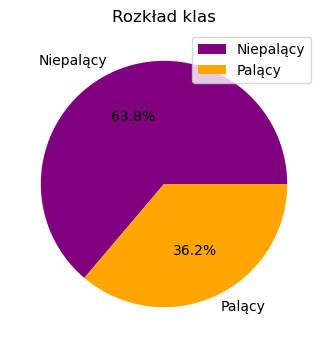

In [10]:
import matplotlib.pyplot as plt

target_dis = df_filtered['smoking'].value_counts()
plt.figure(figsize=(6, 4))
target_dis.plot(kind='pie', labels=['Niepalący', 'Palący'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Rozkład klas')
plt.ylabel('')

plt.legend(loc='upper right')

plt.show()

Zauważyć można, że większość, bo prawie 2/3 badanych pacjentów jest niepaląca. Kolumna ta jest niezrównoważona, ponieważ jedna klasa występuje znacznie częściej niż druga, co wpływa na wydajność modelu klasyfikacyjnego.

Z racji 55k danych w zbiorze *smoking.csv* możemy sobie pozwolić zarówno na metodę oversamplingu, jak i metodę undersamplingu. W przypadku tego wzoru, z uwagi na jego niewielki rozmiar, może jednak okazać się podejście oversamplingu, czyli duplikowania wierszy klasy, której jest w zbiorze zdecydowanie mniej.

## Oversampling

Oversampling to technika mająca na celu zduplikowanie losowych wierszy klasy mniejszościowej. W wyniku oversamplingu liczba danych w zbiorze zwiększa się.

Aby zrównoważyć obie te grupy użyta zostanie metoda $RandomOverSampler$ z biblioteki *imbalanced-learn*, która polega na losowym duplikowaniu próbek z klasy mniejszościowej.

In [11]:
from imblearn.over_sampling import RandomOverSampler

X = df_filtered.drop('smoking', axis=1)
y = df_filtered['smoking'].values.reshape(-1, 1)

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y)

Poniższy kod pokazuje, jaki podział etykiet występuje przed oversamplingiem i po wykonaniu metody $RandomOverSampler$.

In [12]:
y_series = pd.Series(y.flatten())
y_res_series = pd.Series(y_res.flatten())

print("Liczba próbek przed oversamplingiem:")
print(y_series.value_counts())   

print("\nLiczba próbek po oversamplingu:")
print(y_res_series.value_counts())

df_resampled = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['smoking'])], axis=1)

Liczba próbek przed oversamplingiem:
0    34958
1    19829
Name: count, dtype: int64

Liczba próbek po oversamplingu:
0    34958
1    34958
Name: count, dtype: int64


A tak w tej chwilii wartości kolumny etykiet rozkładają się na wykresie kołowym.

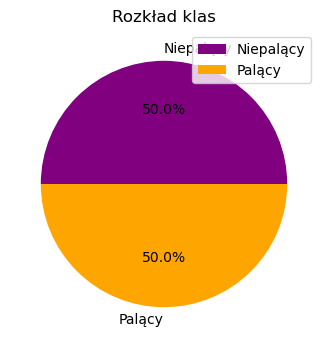

In [13]:
target_dis_resampled = df_resampled['smoking'].value_counts()
plt.figure(figsize=(6, 4))
target_dis_resampled.plot(kind='pie', labels=['Niepalący', 'Palący'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Rozkład klas')
plt.ylabel('')

plt.legend(loc='upper right')

plt.show()

Zbiór danych zostanie teraz podzielony na dwie części: cechy i etykiety. 
Cechy to kolumny, na podstawie których model będzie przypisywał obiekt (w tym przypadku badanego pacjenta) do jednej z dwóch kategorii. Należą  do nich wszystkie kolumny oprócz kolumn 'smoking', 'ID' (identyfikator to nieistotna cecha) oraz 'oral' atrybut, którego wartości przybierają jedynie jedną wartość (cecha, która nie daje żadnej istotnej informacji). 
Etykiety (inaczej targety) to wartości które chcemy przewidzieć. Targetem więc będzie kolumna 'smoking', czyli informacja o tym czy dany pacjent jest palący.

In [14]:
data = df_resampled.drop(['smoking', 'ID'], axis = 1)
target = df_resampled['smoking']

Z wcześniejszego wywołania funkcji *describe()* wynika, że dane numeryczne są nieustandaryzowane (standardowe odchylenia nie są równe 0). Możemy to zaobserwować poniżej.

In [15]:
numeric_data = data.select_dtypes(include='number')

print("Średnia")
print(numeric_data.mean(axis=0))
print("\nStandardowe odchylenie")
print(numeric_data.std(axis=0))

Średnia
age                     43.557269
height(cm)             165.685608
weight(kg)              66.957349
waist(cm)               82.580550
eyesight(left)           1.021745
eyesight(right)          1.017927
hearing(left)            1.024158
hearing(right)           1.024973
systolic               121.648492
relaxation              76.204789
fasting blood sugar     99.588449
Cholesterol            196.389811
triglyceride           130.361648
HDL                     56.426927
LDL                    114.639110
hemoglobin              14.789884
Urine protein            1.086361
serum creatinine         0.899256
AST                     25.768165
ALT                     27.001244
Gtp                     37.824604
dental caries            0.225671
gender_M                 0.701456
tartar_Y                 0.569455
dtype: float64

Standardowe odchylenie
age                    11.993539
height(cm)              8.983174
weight(kg)             12.829474
waist(cm)               9.208066
eyesi

Z powyższych danych możemy się przekonać, że dane numeryczne nie są ustandaryzowane. Za pomocą funkcji fit_transform z biblioteki sklearn.preprocessing standaryzujemy dane, aby uzyskać odchylenie standardowe równe 1.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

print("Średnia")
print(scaled_data.mean(axis=0))
print("Standardowe odchylenie")
print(scaled_data.std(axis=0))

Średnia
[ 2.08134264e-16 -3.57730767e-17 -3.77243354e-16  6.50419576e-16
  4.79684437e-17  6.50419576e-17  2.41265012e-16 -6.65460529e-16
 -3.91877795e-16 -5.34970101e-16  9.59368875e-17  6.99201044e-17
 -1.85369579e-16  4.06512235e-17 -7.15461534e-17 -1.95125873e-16
 -2.04678910e-16 -1.02441083e-15  1.09758303e-16 -2.92688809e-17
 -9.75629364e-17 -6.50419576e-17  6.50419576e-17 -4.06512235e-17]
Standardowe odchylenie
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Po przeskalowaniu danych otrzymaliśmy ustandaryzowane dane numeryczne. Można to stwierdzić obserwując, że standardowe odchylenie we wszystkich przypadkach wynosi 1.

## Podział danych

Przygotowane i ustandaryzowane dane zostaną nastepnie podzielone na zbiór treningowy i zbiór testowy. Zbiór treningowy zawiera 80% danych całego zbioru, zbiór testowy 20%. Dzięki ustawieniu parametru random_state zapewnione jest, że dane, przy każdym uruchomieniu, będą podzielone na te same zbiory.

In [17]:
import torch

torch.manual_seed(42)
np.random.seed(42)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

Kod zostanie następnie przygotowany do trenowania modelu przy użyciu PyTorch. Dane/etykiety treningowe i testowe przekształcone zostaną na tensor za pomocą *torch.tensor()*

In [19]:
import torch.nn as nn
import torch.optim as optim

x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

Dane treningowe i testowe połączone zostaną następnie w pary wejście-wyjście za pomocą klasy *TensorData*, przez co ułatwione będzie użycie ich w modelu.

Klasa *DataLoader* zostanie użyta w celu utworzenia iteratorów, które umożliwią podział danych na części o równym rozmiarze i dostarczenie tych części do modelu.

## Trenowanie modelu

In [20]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=50, shuffle=False)

test_dataset = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=False)

Po przygotowaniu danych możliwe jest utworzenie modelu sieci neuronowej. Sieć składa się z dwóch warstw liniowych:
* pierwsza przyjmuje 24 argumenty na wejście, po to aby przekształcić je w 10 wyjść
* druga posiada 10 wejść (z wyjścia poprzedniej warstwy), które przekształcone będą w 1 wyjście
W pierwszej warstwie liniowej funkcją aktywacji jest funkcja ReLU, która przekształca wartości liniowe na nieliniowe poprzez zastosowanie funkcji max(0, x), co przydatne okazuje się w uczeniu nieliniowych relacji w danych.

Druga warstwa liniowa stosuje funkcję sigmoidalną, która przekształca wartość wyjściową na wartość z przedziału (0, 1).

Po przejściu przez model na wyjściu powinniśmy otrzymać prawdopodobnieństwo przynależności danej próbki do jednej z dwóch klas.

In [21]:
model = nn.Sequential(
    nn.Linear(24, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

Aby możliwa była ocena modelu, skorzystamy z cross-entropii (Binary Cross Entropy Loss). Funkcja *BCELoss()* oblicza stratę między przewidywanymi a rzeczywistymi etykietami.

Trenowanie modelu odbywać się będzie na zasadzie aktualizacji wag w celu minimalizacji funkcji straty. Takie działanie zapewnia algorytm Adam, który, za pomocą wstecznej propagacji błędu, oblicza gradienty funkcji straty względem wszystkich wag modelu i na tej podstawie ustanawia nowe wagi.

In [22]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

W trakcie treningu modelu sieci neuronowej, przeprowadzonych zostanie 10 epok. Każda epoka oznacza, przejście przez cały zbiór treningowy, dzięki czemu model uczył się będzie na całym zestawie danych. 

Każda minigrupa jest przekazywana do modelu, a następnie obliczona jest wartość funkcji straty między wartościami rzeczywistymi i przewidywanymi. Wykonywana jest także wsteczna propagacja, która służy obliczeniu gradientów funkcji straty.

In [23]:
import matplotlib.pyplot as plt
epochs = 10
train_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss +=    loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader.dataset)
    train_losses.append(train_loss)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

Epoka: 1/10, Błąd (trening): 0.5114
Epoka: 2/10, Błąd (trening): 0.4815
Epoka: 3/10, Błąd (trening): 0.4764
Epoka: 4/10, Błąd (trening): 0.4736
Epoka: 5/10, Błąd (trening): 0.4718
Epoka: 6/10, Błąd (trening): 0.4707
Epoka: 7/10, Błąd (trening): 0.4699
Epoka: 8/10, Błąd (trening): 0.4694
Epoka: 9/10, Błąd (trening): 0.4689
Epoka: 10/10, Błąd (trening): 0.4686


Podczas trenowania modelu za pomocą 10 epok, średnia strata treningowa stopniowo maleje z każdą kolejną epoką. Początkowa wartość straty wynosiła około 0.5, a po 10 epokach spadła do około 0.46. Malejąca wartość straty oznacza, że model staje się coraz bardziej skuteczny w przewidywaniu etykiet na podstawie danych treningowych.

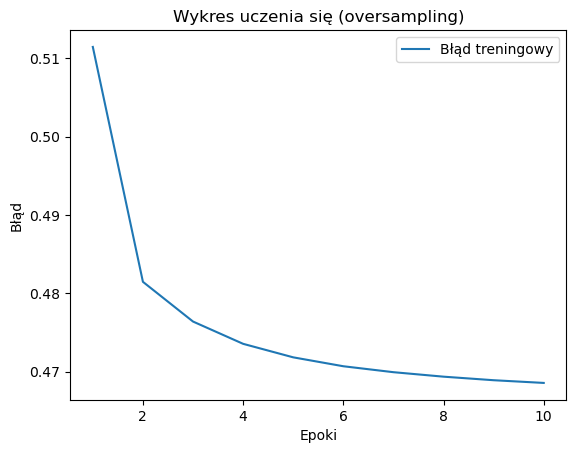

In [24]:
plt.plot(range(1, epochs+1), train_losses, label='Błąd treningowy')
plt.xlabel('Epoki')
plt.ylabel('Błąd')
plt.title('Wykres uczenia się (oversampling)')
plt.legend()
plt.show()

W celu oceny wydajności modelu, przejdziemy przez minigrupy składające się z danych i etykiet treningowych. Dla każdej minigrupy przekazane zostaną dane do modelu w celu uzyskania predykcji, a następnie obliczona zostanie funkcja straty.

Na podstawie uzyskanej pod koniec wykonywania się pętli funkcji straty, możliwe będzie określenie stopnia zdolności modelu do radzenia sobie z nowymi danymi.

In [25]:
import torch
from sklearn.metrics import classification_report

model.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Błąd (test): 0.4675, Dokładność: 0.7738
              precision    recall  f1-score   support

         0.0       0.84      0.67      0.75      6982
         1.0       0.73      0.87      0.79      7002

    accuracy                           0.77     13984
   macro avg       0.78      0.77      0.77     13984
weighted avg       0.78      0.77      0.77     13984



Na podstawie wartości straty podczas trenowania i testowania modelu wysnuć można parę interesujących wniosków:
* podczas trenowania model zmniejszał wartość straty z każdą kolejną epoką, co oznacza, że model coraz lepiej radził sobie z dopasowaniem do danych treningowych w miarę postępu treningu
* wartość straty testowej wynosi 0.4742, co jest zbliżone do wartości straty testowej po 10 epokach (0.4655), co sugeruje, że model dobrze radzi sobie z nowymi danymi
* dokładność modelu na danych testowych wynosi 0.7704, co oznacza, że około 77% predykcji modelu jest zgodne z rzeczywistymi etykietami.

## Undersampling

Jest to metoda polegająca na usuwaniu danych z klasy większościowej. Usuwane są losowe rekordy z próbki większościowej, aż obie klasy będą miały tę samą liczność.

Aby zrównoważyć obie te grupy użyta zostanie metoda $NearMiss$ z biblioteki imbalanced-learn, która polega na zmniejszeniu liczby próbek dominującej klasy, aby zrównoważyć proporcji klas w zbiorze danych.

In [26]:
from imblearn.under_sampling import NearMiss

torch.manual_seed(42)
np.random.seed(42)

under_sampler = NearMiss()
X_res_un, y_res_un = under_sampler.fit_resample(X, y)

Poniższy kod pokazuje, jaki podział etykiet występuje przed undersamplingiem i po wykonaniu metody $NearMiss$.

In [27]:
y_series_un = pd.Series(y.flatten())
y_res_series_un = pd.Series(y_res_un.flatten())

print("Liczba próbek przed undersamplingiem:")
print(y_series_un.value_counts())   

print("\nLiczba próbek po undersamplingu:")
print(y_res_series_un.value_counts())

df_resampled_un = pd.concat([pd.DataFrame(X_res_un), pd.DataFrame(y_res_un, columns=['smoking'])], axis=1)

Liczba próbek przed undersamplingiem:
0    34958
1    19829
Name: count, dtype: int64

Liczba próbek po undersamplingu:
0    19829
1    19829
Name: count, dtype: int64


Także w tym przypadku wartości kolumny *smoking* rozkładają się w stosunku 1:1. Zmienia się natomiast rozmiar zbioru danych, który wynosi teraz nie 70 474, a 40 910 wierszy.

Następnie dzielimy zbiór na dane (przy okazji usuwając kolumnę ID) i etykiety, standaryzujemy dane i dzielimy zbiór na zbiór treningowy i testowy.

In [28]:
data_un = df_resampled_un.drop(['smoking', 'ID'], axis=1)
target_un = df_resampled_un['smoking']

numeric_data_un = data_un.select_dtypes(include='number')
scaled_un = scaler.fit_transform(numeric_data_un)

X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(scaled_un, target_un, test_size=0.2, random_state=42)

Zbiory są następnie przekształcane na tensory oraz dzielone na minigrupy.

In [29]:
x_train_un = torch.tensor(X_train_un, dtype=torch.float32)
y_train_un = torch.tensor(y_train_un.values, dtype=torch.float32)
x_test_un = torch.tensor(X_test_un, dtype=torch.float32)
y_test_un = torch.tensor(y_test_un.values, dtype=torch.float32)

train_dataset_un = TensorDataset(x_train_un, y_train_un)
train_dataloader_un = DataLoader(train_dataset_un, batch_size=50, shuffle=False)

test_dataset_un = TensorDataset(x_test_un, y_test_un)
test_dataloader_un = DataLoader(test_dataset_un, batch_size=50, shuffle=False)

Tak przekształcone dane trenujemy na stworzonym wcześniej modelu *model* także za pomocą cross-entropii oraz algorytmu optymalizacyjnego Adam.

In [30]:
model_un = nn.Sequential(
    nn.Linear(24, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [31]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model_un.parameters(), lr=0.001)

Zbiór poddany undersamplingowy zostanie poddany trenowaniu na takiim samym modelu, co zbiór oversamplingowy.

In [32]:
train_losses = []

for epoch in range(epochs):
    model_un.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer.zero_grad()
        outputs = model_un(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    train_losses.append(train_loss)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

Epoka: 1/10, Błąd (trening): 0.4991
Epoka: 2/10, Błąd (trening): 0.4420
Epoka: 3/10, Błąd (trening): 0.4332
Epoka: 4/10, Błąd (trening): 0.4296
Epoka: 5/10, Błąd (trening): 0.4270
Epoka: 6/10, Błąd (trening): 0.4245
Epoka: 7/10, Błąd (trening): 0.4226
Epoka: 8/10, Błąd (trening): 0.4211
Epoka: 9/10, Błąd (trening): 0.4201
Epoka: 10/10, Błąd (trening): 0.4195


Podczas trenowania modelu za pomocą 10 epok, strata treningowa stopniowo maleje z każdą kolejną epoką. Jest to znak, że model się uczy i staje się coraz bardziej skuteczny. 

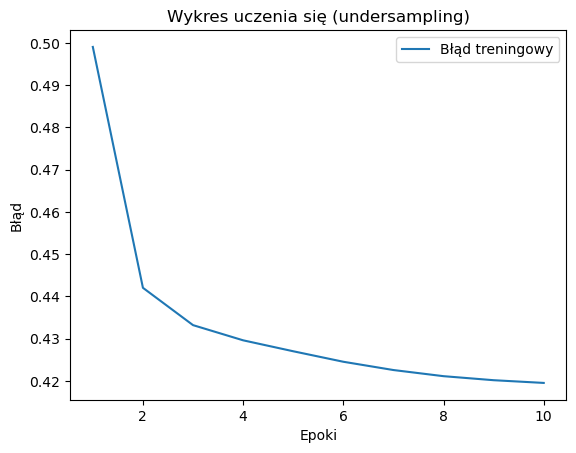

In [33]:
plt.plot(range(1, epochs+1), train_losses, label='Błąd treningowy')
plt.xlabel('Epoki')
plt.ylabel('Błąd')
plt.title('Wykres uczenia się (undersampling)')
plt.legend()
plt.show()

In [34]:
model_un.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model_un(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Błąd (test): 0.4226, Dokładność: 0.7852
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      3973
         1.0       0.77      0.82      0.79      3959

    accuracy                           0.79      7932
   macro avg       0.79      0.79      0.78      7932
weighted avg       0.79      0.79      0.78      7932



Po przełączeniu modelu na tryb ewaluacji, zauważyć można, że zbiór ten ma większą dokładność w stosunku do danych poddanych oversamplingowi. Funkcja straty po ocenie wydajności modelu na danych testowych także jest mniejsza, gdyż wynosi jedynie 0.4154, w stosunku do 0.4742 z oversamplingu.

## Wagi dla etykiet

Technika ta polega na przypisaniu wag próbkom w zależności od ich przynależności do jednej z klas, aby wyrównać wpływ każdej klasy na proces uczenia się modelu. 

Dla każdej z klas określa się wagi. W tym przypadku wagi są odwrotnie proporcjonalne do częstości występowania danej klasy. Klasa liczniej występująca w kolumnie etykiety będzie więc miała mniejszą wagę niż klasa mniejszościowa zbioru.

In [35]:
df_weight = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['smoking'])], axis=1)

Zbiór zostaje podzielony na dane i etykiety, ustandaryzowane zostają jego dane, a następnie następuje podział zbioru na zbiór treningowy i testowy.

In [36]:
data_weight = df_weight.drop(['smoking', 'ID'], axis=1)
target_weight = df_weight['smoking']

numeric_weight = data_weight.select_dtypes(include='number')
scaled_un = scaler.fit_transform(numeric_weight)

X_train_weight, X_test_weight, y_train_w, y_test_w = train_test_split(data_weight, target_weight, test_size=0.2, random_state=42)

Następnie dla zbioru treningowego i testowego zostają utworzone tensory oraz następuje ich podział na minigrupy.

In [37]:
x_train_weight = torch.tensor(X_train_weight.values, dtype=torch.float32)
y_train_weight = torch.tensor(y_train_w.values, dtype=torch.float32)
x_test_weight = torch.tensor(X_test_weight.values, dtype=torch.float32)
y_test_weight = torch.tensor(y_test_w.values, dtype=torch.float32)

train_dataset_weight = TensorDataset(x_train_weight, y_train_weight)
train_dataloader_weight = DataLoader(train_dataset_weight, batch_size=50, shuffle=False)

test_dataset_weight = TensorDataset(x_test_weight, y_test_weight)
test_dataloader_weight = DataLoader(test_dataset_weight, batch_size=50, shuffle=False)

Do trenowania tych danych także użyty zostanie model dwuwarstwowy.

In [38]:
model_weight = nn.Sequential(
    nn.Linear(24, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

Niezbędną częścią tej techniki jest dodanie wag do obu klas. Dla każdej z klas obliczana jest więc waga odwrotnie proporcjonalna do częstości jej występowania.

Następnie do funkcji straty *BCELoss()* przypisane są wagi poszczególnych klas. Dla modelu oznacza to, że dla poszczególnych przykładów w zbiorze danych, funkcja straty będzie uwzględniała przypisane im wagi, co prowadzić będzie do zrównoważenia wpływu obu klas na trening modelu.

In [39]:
class_weights = torch.tensor([1/target_dis[0], 1/target_dis[1]])
criterion_w = nn.BCELoss(weight=class_weights)
optimizer = optim.Adam(model_weight.parameters(), lr=0.001)

In [40]:
# train_losses = []

# for epoch in range(epochs):
#     model_weight.train()
#     train_loss = 0.0
#     for inputs, labels in train_dataloader_weight:
#         optimizer.zero_grad()
#         outputs = model_weight(inputs)
        
#         target_labels = labels.float().view(-1)
#         outputs = outputs.view(-1)
        
#         print(outputs.size())
#         print(target_labels.size())
        
#         loss = criterion_w(outputs, target_labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item() * inputs.size(0)
    
#     train_loss /= len(train_dataloader_weight.dataset)
#     train_losses.append(train_loss)
#     print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

In [41]:
# plt.plot(range(1, epochs+1), train_losses, label='Błąd treningowy')
# plt.xlabel('Epoki')
# plt.ylabel('Błąd')
# plt.title('Wykres uczenia się')
# plt.legend()
# plt.show()

In [42]:
# model_weight.eval()
# test_loss = 0.0
# correct = 0
# total = 0
# predictions = []
# true_labels = []

# with torch.no_grad():
#     for inputs, labels in test_dataloader_weight:
#         outputs = model_weight(inputs)
#         loss = criterion(outputs, labels.view(-1, 1))
#         test_loss += loss.item() * inputs.size(0)
#         predicted = torch.round(outputs)
#         predictions.extend(predicted.cpu().numpy().flatten())
#         true_labels.extend(labels.cpu().numpy().flatten())
#         correct += (predicted == labels.view(-1, 1)).sum().item()
#         total += labels.size(0)

# test_loss /= len(test_dataloader_weight.dataset)
# accuracy = correct / total
# print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

# print(classification_report(true_labels, predictions))

# Testowanie dla metody undersamplingu

Spośród trzech ukazanych wyżej metod wybrana zostaje metoda undersamplingu, aby ukazać skuteczność innych modeli i optymalizatorów w procesie trenowania modelu.

Drugi stworzony model będzie zawierał trzy warstwy liniowe:
* pierwsza warstwa na wejściu przyjmuje 24 cechy po to, aby przekształcić je następnie w 12 wyjść z neuronu,
* druga warstwa przyjmuje wszystkie spośród 12 wyjść z pierwszej warstwy na swoje wejście, na wyjście zaś przekazuje 6 atrybutów,
* ostatnia warstwa liniowa ma 6 wejść i 1 wyjście. Ta warstwa ma za zadanie przekształcić dane na pojedynczą wartość wyjściową, która jest poddana funkcji sigmoidalnej.

Funkcja ReLU jest funkcją aktywacji nieliniową, która przekształca wartość ujemną na 0, pozostawiając nieujemne wartości niezmienione.

In [43]:
model2 = nn.Sequential(
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

Aby możliwa była ocena modelu drugiego, także skorzystamy z cross-entropii (Binary Cross Entropy Loss).

Trenowanie modelu odbywać się będzie na zasadzie aktualizacji wag w celu minimalizacji funkcji stratyza pomocą algorytmu Adam, aby łatwe było porównanie modelu2 z modelem pierwszym.

In [44]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

In [45]:
for epoch in range(epochs):
    model2.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

Epoka: 1/10, Błąd (trening): 0.4947
Epoka: 2/10, Błąd (trening): 0.4294
Epoka: 3/10, Błąd (trening): 0.4234
Epoka: 4/10, Błąd (trening): 0.4197
Epoka: 5/10, Błąd (trening): 0.4173
Epoka: 6/10, Błąd (trening): 0.4155
Epoka: 7/10, Błąd (trening): 0.4141
Epoka: 8/10, Błąd (trening): 0.4130
Epoka: 9/10, Błąd (trening): 0.4120
Epoka: 10/10, Błąd (trening): 0.4111


Wartość straty na zbiorze treningowym zmniejsza się wraz z postępem w treningu. Oznacza to, że model stopniowo dostosowuje się do danych treningowych i coraz lepiej przewiduje etykiety dla przykładów treningowych.

In [46]:
model2.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model2(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Błąd (test): 0.4135, Dokładność: 0.7941
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      3973
         1.0       0.78      0.82      0.80      3959

    accuracy                           0.79      7932
   macro avg       0.80      0.79      0.79      7932
weighted avg       0.80      0.79      0.79      7932



Trzecim testowanym modelem będzie *model3* przedstawiony poniżej. Model ten składa się z dwóch warstw:
* pierwsza warstwa liniowa ma 24 wejścia i 6 wyjść. Jest ona odpowiedzialna za transformację danych wejściowych do mniejszego wymiaru, a aktywacje są przekazywane do funkcji aktywacji ReLU.
* druga warstwa ma 6 wejść, które przekształca w 1 wyjście, któe następnie poddane jest sigmoidalnej funkcji aktywacji, dzięki czemu wartość wyjściowa znajduje się w zakresie między 0 i 1.

In [47]:
model3 = nn.Sequential(
    nn.Linear(24, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

Aby możliwe było łatwe porównanie tych trzech modeli, także w tym przypadku użyta zostanie cross-entropia oraz algorytm optymalizacyjny Adam.

In [48]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)

In [49]:
for epoch in range(epochs):
    model3.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

Epoka: 1/10, Błąd (trening): 0.5074
Epoka: 2/10, Błąd (trening): 0.4438
Epoka: 3/10, Błąd (trening): 0.4343
Epoka: 4/10, Błąd (trening): 0.4286
Epoka: 5/10, Błąd (trening): 0.4248
Epoka: 6/10, Błąd (trening): 0.4223
Epoka: 7/10, Błąd (trening): 0.4205
Epoka: 8/10, Błąd (trening): 0.4191
Epoka: 9/10, Błąd (trening): 0.4179
Epoka: 10/10, Błąd (trening): 0.4170


Obniżanie się wartości straty oznacza, że modele poprawiają swoje predykcje i stają się coraz lepiej dopasowane do danych treningowych.

In [50]:
model3.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model3(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Błąd (test): 0.4193, Dokładność: 0.7883
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      3973
         1.0       0.77      0.83      0.80      3959

    accuracy                           0.79      7932
   macro avg       0.79      0.79      0.79      7932
weighted avg       0.79      0.79      0.79      7932



## Inne optymalizatory

Model pierwszy ma największą dokładność oraz najmniejszą wartość funkcji straty na zbiorze testowym. Jednak w ciągu 10 epok, różnica między stratą po pierwszej epoce, a stratą pod koniec wyniosła około 0.26.

Model drugi znajduje się po środku w zestawieniu modelu zarówno pod względem funkcji straty na zbiorze testowym i dokładności, jak i wydajnością uczenia się po 10 epokach, co oznaczać może, że model ten ma możliwość lepszego wytrenowania, lecz także większe prawdopodobieństwo przetrenowania.

Model trzeci posiada największą różnicę między stratą po pierwszej i ostatniej epoce. Wyniki obejmujące dokładność i stratę po przekształceniu danych testowych ma natomiast najgorsze spośród wszystkich pokazanych tu modeli działających na danych poddanych oversamplingowi.

Z tego powodu następne testy przeprowadzone zostaną na modelu drugim.

Aby zoptymalizować model *model2* można użyć optymalizatora SGD (Stochastic Gradient Descent). Algorytm ten także wykorzystywany jest do minimalizacji funkcji straty poprzez aktualizację wag modelu w kierunku przeciwnym do gradientu funkcji straty.

In [51]:
model2_sgd = nn.Sequential(
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

In [52]:
criterion = nn.BCELoss()
optimizer2 = optim.SGD(model2_sgd.parameters(), lr=0.01)

In [ ]:
for epoch in range(epochs):
    model2_sgd.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer2.zero_grad()
        outputs = model2_sgd(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer2.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

Epoka: 1/10, Błąd (trening): 0.6589
Epoka: 2/10, Błąd (trening): 0.5365
Epoka: 3/10, Błąd (trening): 0.4721
Epoka: 4/10, Błąd (trening): 0.4477
Epoka: 5/10, Błąd (trening): 0.4363
Epoka: 6/10, Błąd (trening): 0.4311
Epoka: 7/10, Błąd (trening): 0.4281
Epoka: 8/10, Błąd (trening): 0.4260
Epoka: 9/10, Błąd (trening): 0.4244


Model trenowany za pomocą algorytmu optymalizacyjnego SGD dostarcza rezultaty podobne do rezultatów algorytmu Adam. Zauważyć można niewielkie różnice wartości funkcji straty między każdymi kolejnymi dwoma epokami. Różnica strat w tym przypadku wynosi jedynie 0.0016.

In [ ]:
model2_sgd.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model2_sgd(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Optymalizator SGD z inną wartością lr

In [ ]:
model2_lr = nn.Sequential(
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer2 = optim.SGD(model2_lr.parameters(), lr=0.2)

In [ ]:
for epoch in range(epochs):
    model2_lr.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer2.zero_grad()
        outputs = model2_lr(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer2.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

In [ ]:
model2_lr.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model2_lr(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Optymalizator SGD z momentum

In [ ]:
model2_momentum = nn.Sequential(
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer_sgd_momentum = optim.SGD(model2_momentum.parameters(), lr=0.01, momentum=0.9)

In [ ]:
for epoch in range(epochs):
    model2_momentum.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer_sgd_momentum.zero_grad()
        outputs = model2_momentum(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer_sgd_momentum.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

In [ ]:
model2_momentum.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model2_momentum(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

Optymalizator RMSprop

In [ ]:
model2_rms = nn.Sequential(
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer_rmsprop = optim.RMSprop(model2_rms.parameters(), lr=0.01) 

In [ ]:
for epoch in range(epochs):
    model2_rms.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer_rmsprop.zero_grad()
        outputs = model2_rms(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer_rmsprop.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

In [ ]:
with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model2_sgd(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))

In [ ]:
model2_adam = nn.Sequential(
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model2_adam.parameters(), lr=0.001)

In [ ]:
for epoch in range(epochs):
    model2_adam.train()
    train_loss = 0.0
    for inputs, labels in train_dataloader_un:
        optimizer.zero_grad()
        outputs = model2_adam(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataloader_un.dataset)
    print(f'Epoka: {epoch+1}/{epochs}, Błąd (trening): {train_loss:.4f}')

In [ ]:
model2_adam.eval()
test_loss = 0.0
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader_un:
        outputs = model2_adam(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item() * inputs.size(0)
        predicted = torch.round(outputs)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(labels.cpu().numpy().flatten())
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

test_loss /= len(test_dataloader_un.dataset)
accuracy = correct / total
print(f'Błąd (test): {test_loss:.4f}, Dokładność: {accuracy:.4f}')

print(classification_report(true_labels, predictions))